In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from sklearn.metrics import mean_squared_error
sns.set_style('whitegrid')

# read training data
train = pd.read_excel('training.xlsx', index_col='Date')
# set frequency = month start
train = train.asfreq("MS")

# read testing data
test = pd.read_excel('testing.xlsx', index_col='Date')
test = test.asfreq('MS')

## Dickey-Fuller test function

In [20]:
# make Dickey–Fuller test and output result
# H0: no stationarity
def df_test(series):
    test = sm.tsa.adfuller(series)
    print('test statistic =', '{0:.4f}'.format(test[0]))
    print('5% significance level =', '{0:.4f}'.format(test[4]['5%']))
    print('pvalue =', '{0:.4f}'.format(test[1]))

## Rolling statistics function

In [21]:
# calculate rolling statistics and plot them
def plot_rolling(series):
    # rolling mean
    rolling_mean = series.rolling(12).mean()
    plt.figure(figsize=(15,5))
    plt.plot(series, 'b', label = 'time series')
    plt.plot(rolling_mean, 'g', label = 'rolling mean')
    plt.legend(loc = 'upper left')
    plt.title('Rolling mean')
    plt.show()
    
    # rolling std
    rolling_std = series.rolling(12).std()
    plt.figure(figsize=(15,5))
    plt.plot(rolling_std, 'g')
    plt.title('Rolling std')
    plt.show()

# Time series stationarity prediction

In [18]:
df_test(train['Value'])

test statistic = -0.2534
5% significance level = -2.8697
pvalue = 0.9319


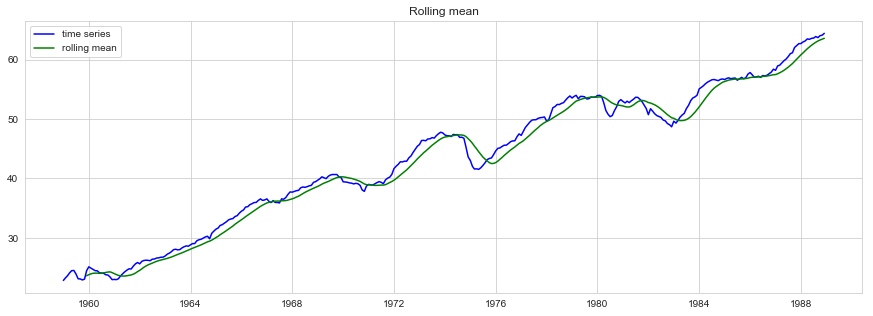

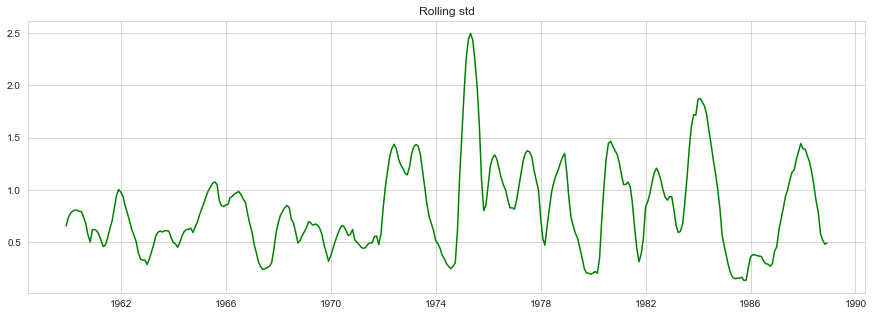

In [5]:
plot_rolling(train)

# Decomposing

## Additive model

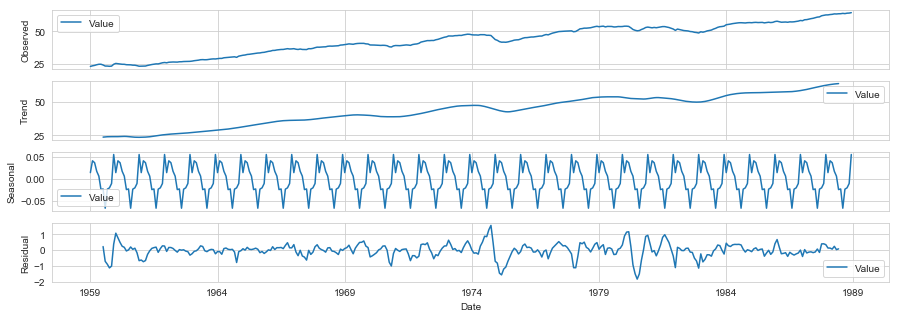

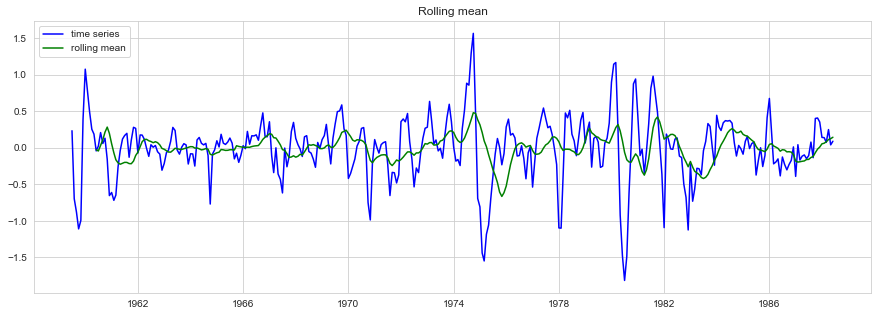

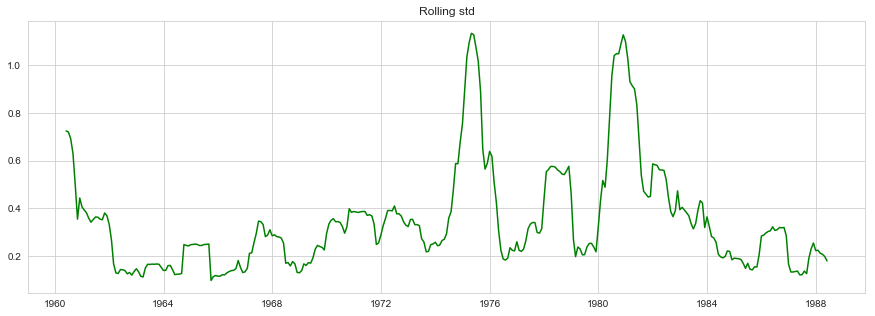

test statistic = -7.4856
5% significance level = -2.8700
pvalue = 0.0000


In [6]:
# decompose time series into trend, seasonal and residual
result = sm.tsa.seasonal_decompose(train, model='additive')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(411, ylabel='Observed')
result.observed.plot(ax=ax1)
ax2 = fig.add_subplot(412, ylabel='Trend', sharex=ax1)
result.trend.plot(ax=ax2)
ax3 = fig.add_subplot(413, ylabel='Seasonal', sharex=ax1)
result.seasonal.plot(ax=ax3)
ax4 = fig.add_subplot(414, ylabel='Residual', sharex=ax1)
result.resid.plot(ax=ax4)
plt.show()

# analyze residual
result.resid = result.resid.dropna()
plot_rolling(result.resid)
df_test(result.resid['Value'])

## Multiplicative model

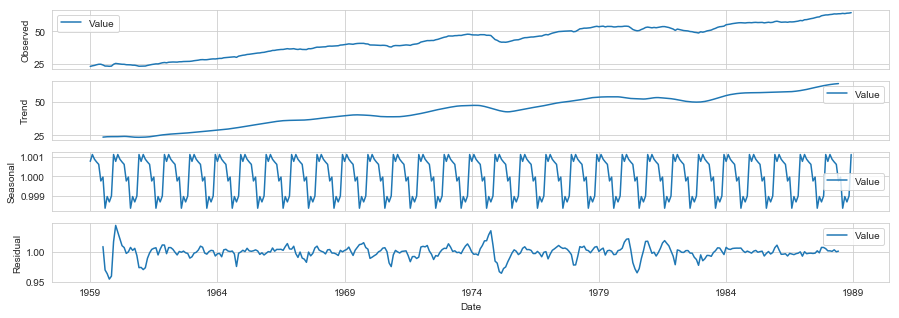

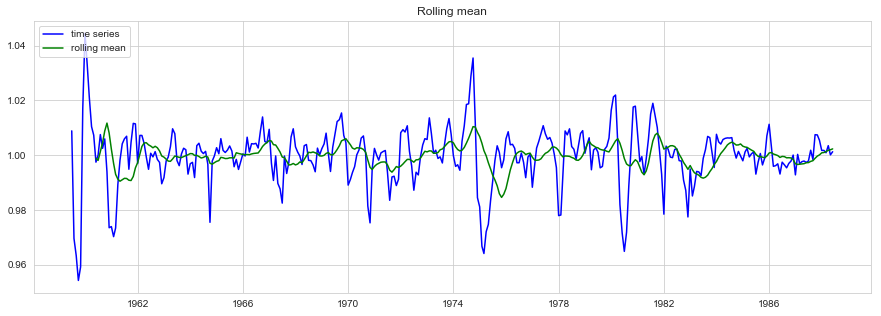

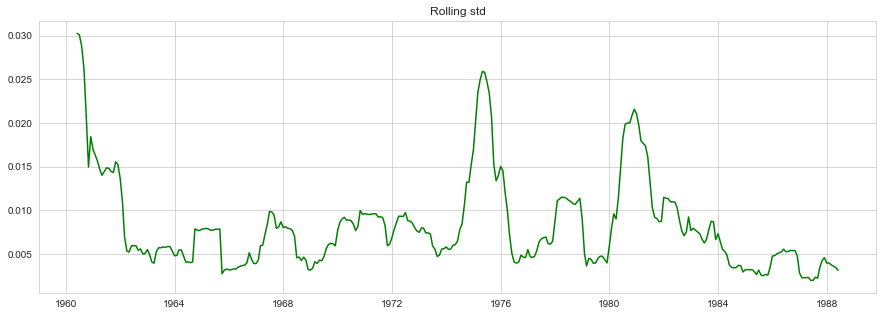

test statistic = -7.4661
5% significance level = -2.8700
pvalue = 0.0000


In [7]:
# decompose time series into trend, seasonal and residual
result = sm.tsa.seasonal_decompose(train, model='multiplicative')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(411, ylabel='Observed')
result.observed.plot(ax=ax1)
ax2 = fig.add_subplot(412, ylabel='Trend', sharex=ax1)
result.trend.plot(ax=ax2)
ax3 = fig.add_subplot(413, ylabel='Seasonal', sharex=ax1)
result.seasonal.plot(ax=ax3)
ax4 = fig.add_subplot(414, ylabel='Residual', sharex=ax1)
result.resid.plot(ax=ax4)
plt.show()

# analyze residual
result.resid = result.resid.dropna()
plot_rolling(result.resid)
df_test(result.resid['Value'])

# Model parameters selection

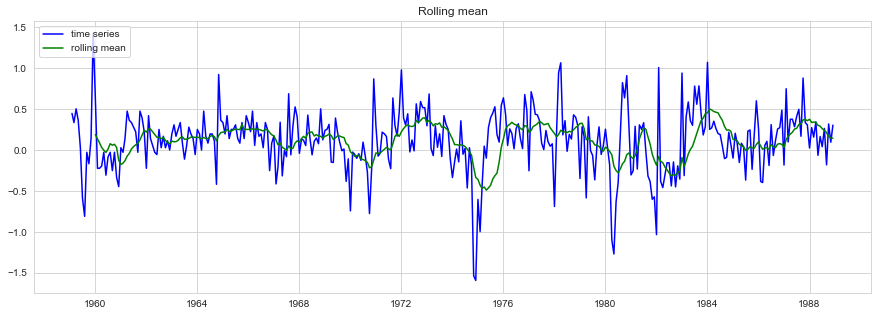

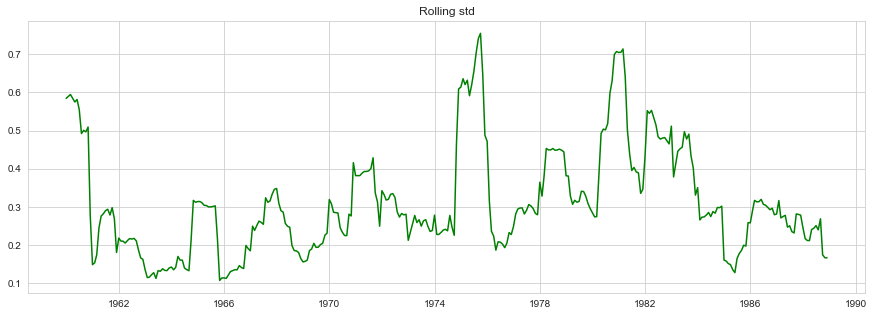

test statistic = -7.3673
5% significance level = -2.8697
pvalue = 0.0000


In [8]:
# differencing to make time series stationary
train1 = train - train.shift()

train1 = train1.dropna()

plot_rolling(train1)
df_test(train1['Value'])

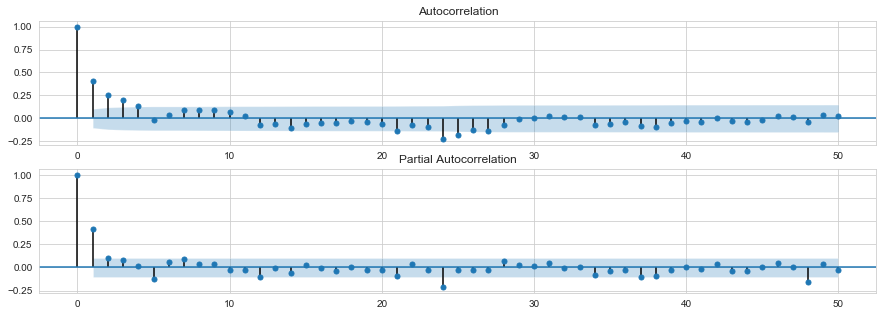

In [9]:
# draw autocorr and partial autocorr graphics
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train1['Value'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train1['Value'], lags=50, ax=ax2)
plt.show()

# Model №1

## Fitting

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -116.282
Method:                       css-mle   S.D. of innovations              0.334
Date:                Fri, 07 Dec 2018   AIC                            246.565
Time:                        21:29:52   BIC                            273.748
Sample:                    02-01-1959   HQIC                           257.375
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1171      0.034      3.421      0.001       0.050       0.184
ar.L1.D.Value    -0.1669      0.253     -0.659      0.511      -0.664       0.330
ma.L1.D.Value     0.5300      0.247     

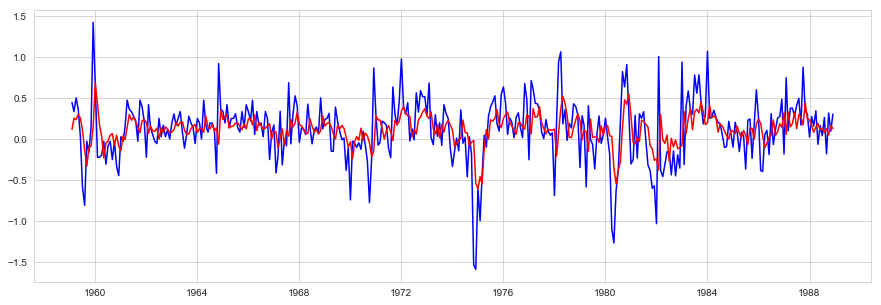

In [26]:
# make ARIMA model
ARIMA_model = ARIMA(train, order=(1,1,4))
mod_fit = ARIMA_model.fit()
print(mod_fit.summary())

plt.figure(figsize=(15,5))
plt.plot(train1, 'b', label = 'differenced train')
plt.plot(mod_fit.fittedvalues, 'r', label = 'fitted values')
plt.show()

## Prediction

r2_score = 10.123556681156508


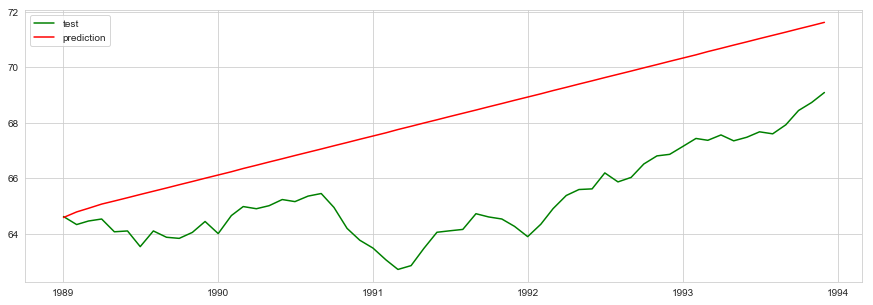

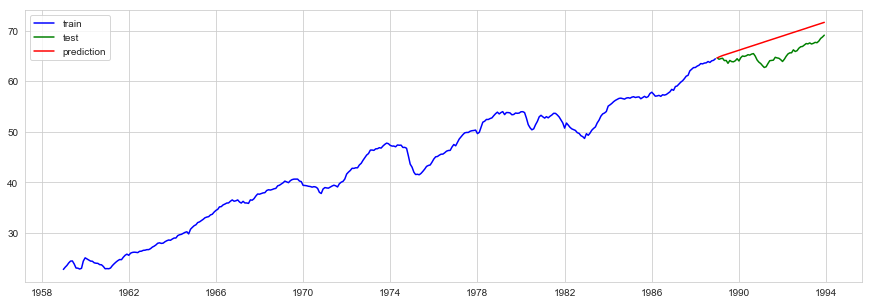

In [11]:
prediction = mod_fit.predict(start=train.shape[0], end=train.shape[0]+test.shape[0]-1, typ='levels')
    
error = mean_squared_error(test, prediction)
print('r2_score =',error)

plt.figure(figsize=(15,5))
plt.plot(test, 'g', label = 'test')
plt.plot(prediction, 'r', label = 'prediction')
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(train, 'b', label = 'train')
plt.plot(test, 'g', label = 'test')
plt.plot(prediction, 'r', label = 'prediction')
plt.legend(loc = 'upper left')
plt.show()

## Model №2

## Fitting

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Fri, 07 Dec 2018   AIC                            248.734
Time:                        21:29:39   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

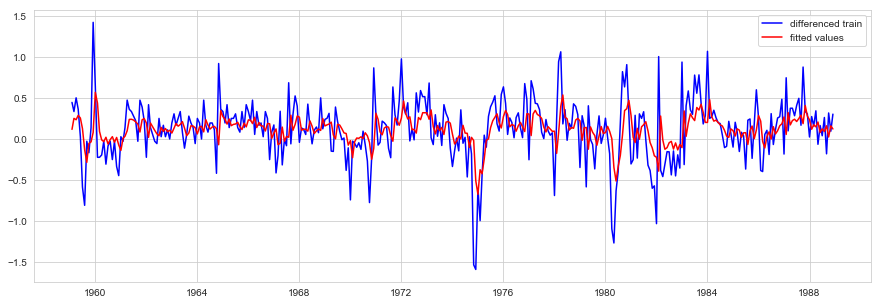

In [25]:
# make ARIMA model
ARIMA_model = ARIMA(train, order=(1,1,1))
mod_fit = ARIMA_model.fit()
print(mod_fit.summary())

plt.figure(figsize=(15,5))
plt.plot(train1, 'b', label = 'differenced train')
plt.plot(mod_fit.fittedvalues, 'r', label = 'fitted values')
plt.legend(loc = 'upper right')
plt.show()

## Prediction

r2_score = 10.365173737159632


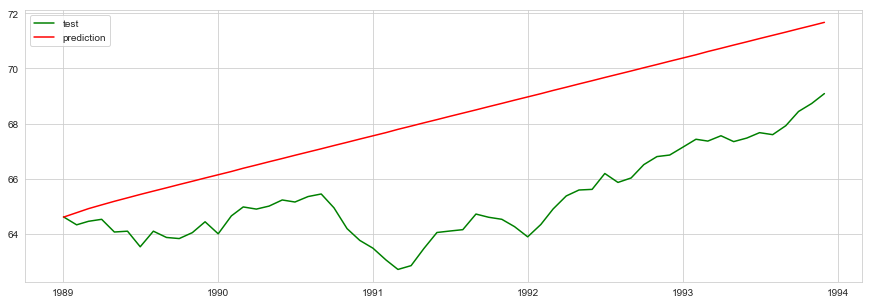

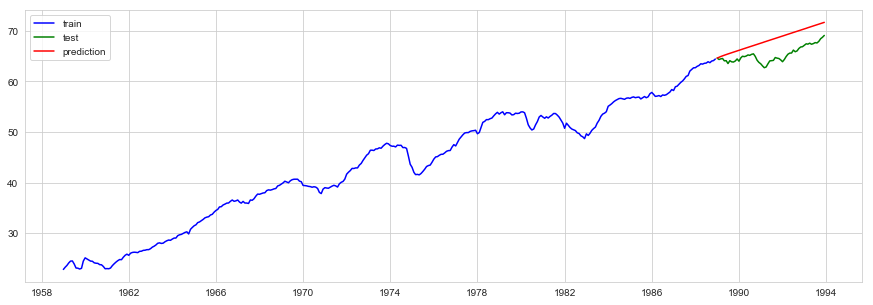

In [13]:
prediction = mod_fit.predict(start=train.shape[0], end=train.shape[0]+test.shape[0]-1, typ='levels')
    
error = mean_squared_error(test, prediction)
print('r2_score =',error)

plt.figure(figsize=(15,5))
plt.plot(test, 'g', label = 'test')
plt.plot(prediction, 'r', label = 'prediction')
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(train, 'b', label = 'train')
plt.plot(test, 'g', label = 'test')
plt.plot(prediction, 'r', label = 'prediction')
plt.legend(loc = 'upper left')
plt.show()